<img src="https://github.com/DahyannAraya/climada_copernicus_seasonal_forecast_workshop/blob/main/images/Logos.png?raw=1" title="Institutional Logos" width="70%">

## Copernicus Seasonal Forecast Module

This module is developed to manage seasonal forecast data from the [Copernicus Climate Data Store](https://cds.climate.copernicus.eu) (CDS) for the [U-CLIMADAPT project](https://www.copernicus-user-uptake.eu/user-uptake/details/responding-to-the-impact-of-climate-change-u-climadapt-488).
It offers comprehensive tools for downloading, processing, computing climate indices, and generating hazard objects based on seasonal forecast datasets, particularly [Seasonal forecast daily and subdaily data on single levels](https://cds.climate.copernicus.eu/datasets/seasonal-original-single-levels?tab=overview).
The module is tailored to integrate seamlessly with the [CLIMADA](https://climada.ethz.ch/)(CLIMate ADAptation) platform, supporting climate risk assessment and the development of effective adaptation strategies.

Features:
- Download seasonal forecast data from CDS
- Process raw data into climate indices
- Calculate various heat-related indices (e.g., Maximum Temperature, Tropical Nights)
- Create CLIMADA Hazard objects for further risk analysis
- Visualize hazard data

Prerequisites:

1. CDS account and API key:
   Register at https://cds.climate.copernicus.eu

2. CDS API client installation:
   pip install cdsapi

3. CDS API configuration:
   Create a .cdsapirc file in your home directory with your API key and URL.
   For instructions, visit: https://cds.climate.copernicus.eu/how-to-api#install-the-cds-api-client

4. Dataset Terms and Conditions: After selecting the dataset to download, make
   sure to accept the terms and conditions on the corresponding dataset webpage in the CDS portal before running this notebook. Here, https://cds.climate.copernicus.eu/datasets/seasonal-original-single-levels?tab=download.

Usage:
This module is typically imported and used within larger scripts or applications for climate data processing
and risk assessment. See individual function docstrings for specific usage instructions.

**Note**:
Ensure you have the **necessary permissions** and comply with the CDS data usage policies when using this module. You can view the terms and conditions at https://cds.climate.copernicus.eu/datasets/seasonal-original-single-levels?tab=download. You can find them at the bottom of the download page.

### Setup and Installation (Google Colab Only)

This section installs and configures all necessary dependencies for running the seasonal forecast module in Google Colab. If you are running this notebook locally, you should install these dependencies manually in your environment instead.
Installed Dependencies:

    - cdsapi: For accessing the Copernicus Climate Data Store (CDS)
    - climada and climada-petals: For climate impact analysis
    - The seasonal forecast module: For processing and analyzing seasonal forecasts



#### Install Copernicus Climate Data Store (CDS) API

In [2]:
# Configure Copernicus API credentials (FOR DEMONSTRATION ONLY)
# ⚠️ This API key is temporary and will not be available after this session.
# If you already have your own CDS key, replace it and use it here.
# To access data from the Copernicus Climate Data Store (CDS), you must use your personal API key.
# Register at https://cds.climate.copernicus.eu and follow the setup instructions to obtain your key.

url = 'url: https://cds.climate.copernicus.eu/api'
key = 'key: 5df55c41-98f3-4e60-b751-9c8cd43e90c7'

with open('/root/.cdsapirc', 'w') as f:
    f.write('\n'.join([url, key]))

with open('/root/.cdsapirc') as f:
    print(f.read())

url: https://cds.climate.copernicus.eu/api
key: 5df55c41-98f3-4e60-b751-9c8cd43e90c7


In [3]:
!pip install "cdsapi>=0.7.4"

In [4]:
import cdsapi
c = cdsapi.Client(debug=True)

2025-03-20 12:27:14,224 DEBUG GET https://cds.climate.copernicus.eu/api/catalogue/v1/messages
DEBUG:datapi.legacy_api_client:GET https://cds.climate.copernicus.eu/api/catalogue/v1/messages
2025-03-20 12:27:14,640 DEBUG REPLY {"messages":[{"id":"sites/cds/2024/2024-03-01-production-keycloak.md","date":"2024-09-26T00:00:00","summary":null,"url":null,"severity":"info","content":"Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.","live":true},{"id":"sites/cds/2024/2024-06-17-beta-warning1.md","date":"2024-06-16T00:00:00","summary":null,"url":null,"severity":"warning","content":"CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the \"Show API request code\" tool on the dataset Download Form to check you are using the correct syntax for your API request.","live":true}]}
DEBUG:datapi.legacy_api_client:REPLY {"messages":[{"id":"sites/cds/2024/2024-03-01-production-keycloak.md","d

In [5]:
import cdsapi

client = cdsapi.Client()

dataset = 'reanalysis-era5-pressure-levels'
request = {
  'product_type': ['reanalysis'],
  'variable': ['geopotential'],
  'year': ['2024'],
  'month': ['03'],
  'day': ['01'],
  'time': ['13:00'],
  'pressure_level': ['1000'],
  'data_format': 'grib',
}
target = 'download.grib'

client.retrieve(dataset, request, target)

2025-03-20 12:27:15,019 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
INFO:datapi.legacy_api_client:[2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-20 12:27:15,022 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-03-20 12:27:15,381 INFO Request ID is 8c5ed891-b97e-48fc-a2d1-b2f3a78b4b57
INFO:datapi.legacy_api_client:Request ID is 8c5ed891-b97e-48fc-a2d1-b2f3a78b4b57
2025-03-20 12:27:15,532 INFO status has been updated to accepted
INFO:datapi.legacy_api_client:status has been updated to accepted
2025-03-20 12:27:20,720 INFO status has been updated to successful
INFO:datapi.legacy_api_client:status has been 

78cf4326bae1c78bb7394803a5713ae3.grib:   0%|          | 0.00/1.98M [00:00<?, ?B/s]

'download.grib'

#### Install CLIMADA

In [6]:
!git clone https://github.com/CLIMADA-project/climada_python.git

fatal: destination path 'climada_python' already exists and is not an empty directory.


In [7]:
%cd climada_python

/content/climada_python


In [8]:
!pip install -e .

Obtaining file:///content/climada_python
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Installing backend dependencies ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for climada (pyproject.toml) ... done
  Created wheel for climada: filename=climada-6.0.1-0.editable-py3-none-any.whl size=19586 sha256=91e457d83e51f1ca2611b8a674a5b7eea8932a13690881700986ed14d8d896df
  Stored in directory: /tmp/pip-ephem-wheel-cache-swg0qopc/wheels/1d/8b/5c/73a112fe4921aceefa9c417fb6cd8e08075d7ad20c85b2d14c
Successfully built climada
  Attempting uninstall: climada
    Found existing installation: climada 6.0.1
    Uninstalling climada-6.0.1:
      Successfully uninstalled climada-6.0.1


#### Install the Copernicus Forecast module from the CLIMADA Petals repository

In [9]:
!pip install fiona

In [10]:
import climada

# A simple example to test functionality
from climada.entity import Exposures
from climada.hazard import Hazard

In [11]:
!git clone https://github.com/CLIMADA-project/climada_petals.git

fatal: destination path 'climada_petals' already exists and is not an empty directory.


In [12]:
%cd climada_petals

/content/climada_python/climada_petals


In [13]:
!pip install -e .

Obtaining file:///content/climada_python/climada_petals
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Installing backend dependencies ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for climada_petals (pyproject.toml) ... done
  Created wheel for climada_petals: filename=climada_petals-6.0.2.dev0-0.editable-py3-none-any.whl size=18473 sha256=c709dc7ac462e4305c970907584ece3254308c7b40953d12b562628a74a2f4ec
  Stored in directory: /tmp/pip-ephem-wheel-cache-4egz7s48/wheels/bf/23/47/50d30f9a06507d07d4eb416851cb9beebb5cf7f55fa529bf1a
Successfully built climada_petals
  Attempting uninstall: climada_petals
    Found existing installation: climada_petals 6.0.2.dev0
    Uninstalling climada_petals-6.0.2.dev0:
      Successfully uninstalled climada_petals-6.0.2.dev0


In [14]:
import climada

# A simple example to test functionality
from climada.entity import Exposures
from climada.hazard import Hazard

In [15]:
!pip install git+https://github.com/CLIMADA-project/climada_petals.git@feature/copernicus_forecast

  Cloning https://github.com/CLIMADA-project/climada_petals.git (to revision feature/copernicus_forecast) to /tmp/pip-req-build-f3mok5a7
  Running command git clone --filter=blob:none --quiet https://github.com/CLIMADA-project/climada_petals.git /tmp/pip-req-build-f3mok5a7
  Running command git checkout -b feature/copernicus_forecast --track origin/feature/copernicus_forecast
  Switched to a new branch 'feature/copernicus_forecast'
  Branch 'feature/copernicus_forecast' set up to track remote branch 'feature/copernicus_forecast' from 'origin'.
  Resolved https://github.com/CLIMADA-project/climada_petals.git to commit 133a2a30a7b234305fb34b88cce7f5084a771053
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for climada_petals: filename=climada_petals-6.0.2.dev0-py3-none-any.whl size=5351148 sha256=f5055299340ca42747e29c64617ced89f237e58bbf0a737f

In [16]:
# Import packages
import climada

import warnings
import datetime as dt
warnings.filterwarnings('ignore')

from climada.hazard import Hazard
from climada_petals.hazard.copernicus_interface.create_seasonal_forecast_hazard import SeasonalForecast, month_name_to_number

# these functions could also be imported from climada_python in the future
from climada_petals.hazard.copernicus_interface.temporary_bounding_box_functions import (
    bounding_box_from_cardinal_bounds, bounding_box_global, bounding_box_from_countries
    )

### Set up module parameters

To configure the module for working with Copernicus forecast data and converting it into a hazard object for CLIMADA, you will need to define several essential parameters. These settings are crucial as they specify the type of data to be retrieved, the format, the forecast period, and the geographical area of interest. These parameters influence how the forecast data is processed and transformed into a hazard object.

Below, we outline these parameters and use an example for the "Maximum Temperature" index to demonstrate the seasonal forecast functionality.

To learn more about what these parameters entail and their significance, please refer to the [documentation on the CDS webpage](https://cds.climate.copernicus.eu/datasets/seasonal-original-single-levels?tab=overview).

#### Overview of parameters

**index_metric**: Defines the type of index to be calculated. The current options available are 'HIA' (Heat Index Adjusted), 'HIS' (Heat Index Simplified), 'Tmean' (Mean Temperature), 'Tmin' (Minimum Temperature), 'Tmax' (Maximum Temperature), 'HW' (Heat Wave), 'TR' (Tropical Nights), 'TX30' (Hot Days), 'HUM' (Humidex), 'RH' (Relative Humidity), 'AT' (Apparent Temperature), and 'WBGT' (Wet Bulb Globe Temperature (Simple)).

  - **Heat Waves ("HW")**:  
    If `index_metric` is set to 'HW' for heat wave calculations, additional parameters can be specified to fine-tune the heat wave detection:

    - **threshold**: Temperature threshold above which days are considered part of a heat wave. Default is 27°C.
    - **min_duration**: Minimum number of consecutive days above the threshold required to define a heat wave event. Default is 3 days.
    - **max_gap**: Maximum allowable gap (in days) between two heat wave events to consider them as one single event. Default is 0 days.

  - **Tropical Nights ("TR")**:  
    If `index_metric` is set to 'TR' for tropical nights, an additional parameter can be specified to set the threshold:

    - **threshold**: Nighttime temperature threshold, above which a night is considered "tropical." Default is 20°C.



**format** : Specifies the format of the data to be downloaded, "grib" or "netcdf". Copernicus do **NOT** recommended netcdf format for operational workflows since conversion to netcdf is considered experimental. [More information here](https://confluence.ecmwf.int/display/CKB/GRIB+to+netCDF+conversion+on+new+CDS+and+ADS+systems).

**originating_centre**: Identifies the source of the data. A standard choice is "dwd" (German Weather Service), one of eight providers including ECMWF, UK Met Office, Météo France, CMCC, NCEP, JMA, and ECCC.

**system**: Refers to a specific model or configuration used for forecasts. In this script, the default value is "21," which corresponds to the GCSF (German Climate Forecast System) [version 2.1](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2020MS002101). More details can be found in the [CDS documentation](https://cds-beta.climate.copernicus.eu/datasets/seasonal-original-single-levels?tab=documentation).

**year_list**: A list of years for which data should be downloaded and processed.

**initiation_month**: A list of the months in which the forecasts are initiated. Example: ["March", "April"].

**lead_time_months**: Specifies the months relative to the forecast's initiation month for which the data is forecasted. Example: ["June", "July", "August"] indicates forecasts for these months. The maximum available is 7 months.

  - **⚠️ Important**: When an initiation month is in one year and the forecast period in the next, the system recognizes the forecast extends beyond the initial year. Data is retrieved based on the initiation month, with lead times covering the following year. The forecast is stored under the initiation year’s directory, ensuring consistency while spanning both years.

**area_selection**: This determines the geographical area for which the data should be downloaded. It can be set to
- "global" (gobal data is downloaded)
- a list of four numbers corresponding to the geographical bounds (in degrees; EPSG:4326), specified as [north, west, south, east].
- a list of ISO alpha-3 codes for different countries, e.g., ["DEU", "CHE"] for Germany and Switzerland. See this [wikipedia page](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3) for the country codes. Note that the **joint region** will be downloaded and processed, i.e., handling data for ["DEU", "CHE"] and then for ["CHE"] will download and generate two sets of data.

**overwrite**: Boolean flag that, when set to True, forces the system to redownload and reprocess existing files.

In [17]:
# We define above parameters for an example
index_metric = "TX30"
data_format = "grib"  # 'grib' or 'netcdf'
originating_centre =  "dwd"
system =  "21"
lead_time_months = ["Jun", "August"] # from jun to august including july
year_list = [2023]
initiation_month = [ "March","April","May"]
#["January", "March", "May"]
overwrite = False

# global bounding box
# bounds = bounding_box_global()
# input cardinal bounds
# bounds = bounding_box_from_cardinal_bounds(northern=49, eastern=20, southern=40, western=10)
# input country ISO codes
bounds = bounding_box_from_countries(["CHE"])

# Parameters for Heat Waves
hw_threshold = 27
hw_min_duration = 3
hw_max_gap = 0

# Parameters for Tropical Nights
threshold_tr = 20

# Describe the selected climate index and the associated input data
handler = SeasonalForecast(
    index_metric=index_metric,
    year_list=year_list,
    lead_time_months=lead_time_months,
    initiation_month=initiation_month,
    bounds=bounds,
    data_format=data_format,
    originating_centre=originating_centre,
    system=system,
    )

handler.explain_index()

'Explanation for TX30: Hot Days (TX30): Counts days with maximum temperature exceeding 30°C. \nRequired variables: 2m_temperature'

### Download and Process Data

The `handler.download_and_process_data` method in CLIMADA efficiently retrieves and organizes Copernicus forecast data. It checks for existing files to avoid redundant downloads, stores data by format (grib or netCDF), year, month. Then the files are processed for further analysis, such as calculating climate indices or creating hazard objects within CLIMADA. Here are the aspects of this process:

- **Data Download**: The method downloads the forecast data for the selected years, months, and regions. The data is retrieved in **grib** or **netCDF** formats, which are commonly used for storing meteorological data. If the required files already exist in the specified directories, the system will skip downloading them, as indicated by the log messages such as:  
  *"Corresponding grib file SYSTEM_DIR/copernicus_data/seasonal_forecasts/dwd/2022/init05/valid05_06/downloaded_data/grib/Tmax_boundsW-110_S-56_E-65_N-16.grib already exists."*


- **Data Processing**: After downloading (or confirming the existence of) the files, the system converts them into daily **netCDF** files. This format suseful for working with multi-dimensional climate data. The log messages confirm the existence or creation of these files, for example:  
  *"Daily file SYSTEM_DIR/copernicus_data/seasonal_forecasts/dwd/2022/init05/valid05_06/processed_data/Tmax_boundsW-110_S-56_E-65_N-16.nc already exists."*

- **Geographic and Temporal Focus**: The files are generated for a specific time frame (e.g., June and July 2022) and a predefined geographic region, as specified by the parameters such as `bounds`, `month_list`, and `year_list`. This ensures that only the selected data for your analysis is downloaded and processed.

- **Data Completeness**: Messages like "already exists" ensure that you do not redundantly download or process data, saving time and computing resources. However, if the data files are missing, they will be downloaded and processed as necessary.

In [18]:
# Download and process data
handler.download_and_process_data()

2025-03-20 12:29:30,133 - climada_petals.hazard.copernicus_interface.create_seasonal_forecast_hazard - INFO - /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/downloaded_data/grib/TX30_boundsW4_S44_E11_N48.grib already exists.
2025-03-20 12:29:30,135 - climada_petals.hazard.copernicus_interface.create_seasonal_forecast_hazard - INFO - /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init04/valid06_08/downloaded_data/grib/TX30_boundsW4_S44_E11_N48.grib already exists.
2025-03-20 12:29:30,136 - climada_petals.hazard.copernicus_interface.create_seasonal_forecast_hazard - INFO - /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init05/valid06_08/downloaded_data/grib/TX30_boundsW4_S44_E11_N48.grib already exists.
2025-03-20 12:29:30,137 - climada_petals.hazard.copernicus_interface.create_seasonal_forecast_hazard - INFO - /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/processe

{'downloaded_data': {'2023_init03_valid06_08': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/downloaded_data/grib/TX30_boundsW4_S44_E11_N48.grib'),
  '2023_init04_valid06_08': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init04/valid06_08/downloaded_data/grib/TX30_boundsW4_S44_E11_N48.grib'),
  '2023_init05_valid06_08': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init05/valid06_08/downloaded_data/grib/TX30_boundsW4_S44_E11_N48.grib')},
 'processed_data': {'2023_init03_valid06_08': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/processed_data/TX30_boundsW4_S44_E11_N48.nc'),
  '2023_init04_valid06_08': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init04/valid06_08/processed_data/TX30_boundsW4_S44_E11_N48.nc'),
  '2023_init05_valid06_08': PosixPath('/root/climada/data/copernicus_data

### Calculate Climate Indices

When you use the `handler.calculate_index` method in CLIMADA to compute specific climate indices (such as Maximum Temperature), the generated output is saved and organized in a structured format for further analysis. Here some details:

- **Index Calculation**: The method processes seasonal forecast data to compute the selected index for the chosen years, months, and regions. This index represents a specific climate condition, such as the number of Maximum Temperature ("Tmax") over the forecast period, as defined in the parameters.

- **Data Storage**: The calculated index data is saved in **netCDF** format. These files are automatically saved in directories specific to the index and time period. The file paths are printed below the processing steps. For example, the computed index values are stored in:  
  *"SYSTEM_DIR/copernicus_data/seasonal_forecasts/dwd/2022/init05/valid05_06/indices/Tmax/Tmax_boundsW-110_S-56_E-65_N-16_daily.nc"*.

  Similarly, the statistics of the index (e.g., mean, max, min, std) are saved in:  
  *"SYSTEM_DIR/copernicus_data/seasonal_forecasts/dwd/2022/init05/valid05_06/indices/Tmax/Tmax_boundsW-110_S-56_E-65_N-16_stats.nc"*.
  These files ensure that both the raw indices and their statistical summaries are available for detailed analysis.
  
  Each file contains data for a specific month and geographic region, as defined in the parameters. This allows you to analyze how the selected climate index varies over time and across different locations.

- **Completeness of Data Processing**: Messages 'Index Tmax successfully calculated and saved for...' confirm the successful calculation and storage of the index, ensuring that all requested data has been processed and saved correctly.

In [19]:
# Calculate index
handler.calculate_index(hw_threshold=hw_threshold, hw_min_duration=hw_min_duration, hw_max_gap=hw_max_gap)

2025-03-20 12:29:30,153 - climada_petals.hazard.copernicus_interface.create_seasonal_forecast_hazard - INFO - Processing index TX30 for year 2023, initiation month 03.
2025-03-20 12:29:30,159 - climada_petals.hazard.copernicus_interface.create_seasonal_forecast_hazard - INFO - A file of ['/root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/indices/TX30/TX30_boundsW4_S44_E11_N48_daily.nc', '/root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/indices/TX30/TX30_boundsW4_S44_E11_N48_monthly.nc', '/root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/indices/TX30/TX30_boundsW4_S44_E11_N48_stats.nc'] already exists.
2025-03-20 12:29:30,160 - climada_petals.hazard.copernicus_interface.create_seasonal_forecast_hazard - INFO - Processing index TX30 for year 2023, initiation month 04.
2025-03-20 12:29:30,161 - climada_petals.hazard.copernicus_interface.create_seasonal_forecast_hazard - INFO - A

{'2023_init03_valid06_08': {'daily': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/indices/TX30/TX30_boundsW4_S44_E11_N48_daily.nc'),
  'monthly': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/indices/TX30/TX30_boundsW4_S44_E11_N48_monthly.nc'),
  'stats': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/indices/TX30/TX30_boundsW4_S44_E11_N48_stats.nc')},
 '2023_init04_valid06_08': {'daily': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init04/valid06_08/indices/TX30/TX30_boundsW4_S44_E11_N48_daily.nc'),
  'monthly': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init04/valid06_08/indices/TX30/TX30_boundsW4_S44_E11_N48_monthly.nc'),
  'stats': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init04/valid06_08/indices/TX30/TX30_boundsW4_S44

### Calculate a Hazard Object

When you use the `handler.process_and_save_hazards` method in CLIMADA to convert processed index from Copernicus forecast data into a hazard object:

- **Hazard Object Creation**: The method processes seasonal forecast data for specified years and months, converting these into hazard objects. These objects encapsulate potential risks associated with specific weather events or conditions, such as Maximum Temperature ('Tmax') indicated in the parameters, over the forecast period.

- **Data Storage**: The hazard data for each ensemble member of the forecast is saved as HDF5 files. These files are automatically stored in specific directories corresponding to each month and type of hazard. The file paths are printed below the processing steps. For example, *"/SYSTEM_DIR/copernicus_data/seasonal_forecasts/dwd/2022/init05/valid05_06/hazard/Tmax/Tmax_boundsW-110_S-56_E-65_N-16.hdf5"*.
 HDF5 is a versatile data model that efficiently stores large volumes of complex data.

 Each file is specific to a particular month and hazard scenario ('Tmax' in this case) and covers all ensemble members for that forecast period, aiding in detailed risk analysis.

- **Completeness of Data Processing**: Messages like 'Completed processing for 2022-07. Data saved in...' confirm the successful processing and storage of the hazard data for that period, ensuring that all requested data has been properly handled and stored.

#### Visualizing the Calculated Hazard Object

Once the hazard object has been successfully calculated, the last element created is printed for visualization. This is important for several reasons:

- **Initial Data Inspection**: The visualization allows you to view a slice of the forecast data, providing a quick check of the results. This initial glimpse helps you verify that the data processing was successful and provides insights into the distribution of the hazard (in this case, Maximum Temperature) across the area of interest.

- **Geographic Accuracy**: The map helps you verify if the correct geographic region was processed and plotted. This is particularly useful as it allows immediate feedback on whether the user-defined boundaries or selected areas (e.g., Germany and Switzerland) were captured correctly.

- **Data Quality Check**: Visualizing the output also serves as a preliminary quality check, allowing you to detect any unexpected results or anomalies in the data. For instance, the color bar indicating the "Intensity (days)" gives an indication of how the hazard index is distributed across the mapped area.

- **Quick Workflow Testing**: This step is essential for testing the entire workflow, ensuring that the process is working as expected from data download, processing, and hazard object creation to visualization.

This output provides a structured dataset ready for further analysis within the CLIMADA framework, allowing for the evaluation of potential impacts and the planning of mitigation strategies.

In [20]:
handler.save_index_to_hazard()

2025-03-20 12:29:30,174 - climada_petals.hazard.copernicus_interface.create_seasonal_forecast_hazard - INFO - Creating hazard for index TX30 for year 2023, initiation month 03.
2025-03-20 12:29:30,176 - climada_petals.hazard.copernicus_interface.create_seasonal_forecast_hazard - INFO - /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/hazard/TX30/TX30_boundsW4_S44_E11_N48.hdf5 already exists.
2025-03-20 12:29:30,177 - climada_petals.hazard.copernicus_interface.create_seasonal_forecast_hazard - INFO - Creating hazard for index TX30 for year 2023, initiation month 04.
2025-03-20 12:29:30,178 - climada_petals.hazard.copernicus_interface.create_seasonal_forecast_hazard - INFO - /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init04/valid06_08/hazard/TX30/TX30_boundsW4_S44_E11_N48.hdf5 already exists.
2025-03-20 12:29:30,179 - climada_petals.hazard.copernicus_interface.create_seasonal_forecast_hazard - INFO - Creating hazard for inde

{'2023_init03_valid06_08': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/hazard/TX30/TX30_boundsW4_S44_E11_N48.hdf5'),
 '2023_init04_valid06_08': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init04/valid06_08/hazard/TX30/TX30_boundsW4_S44_E11_N48.hdf5'),
 '2023_init05_valid06_08': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init05/valid06_08/hazard/TX30/TX30_boundsW4_S44_E11_N48.hdf5')}

## Example for reading and plotting hazard

The saved hazard file can then be read and processed by standard CLIMADA methods. For instance, below, we load the hazard for the last month and plot the intensity per grid point maximized over all forecast ensemble members.

2025-03-20 12:29:30,614 - climada.hazard.io - INFO - Reading /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/hazard/TX30/TX30_boundsW4_S44_E11_N48.hdf5
Available Dates Across Members: ['2023-06-01', '2023-07-01', '2023-08-01']
Selected Date for Plotting: 2023-08-01


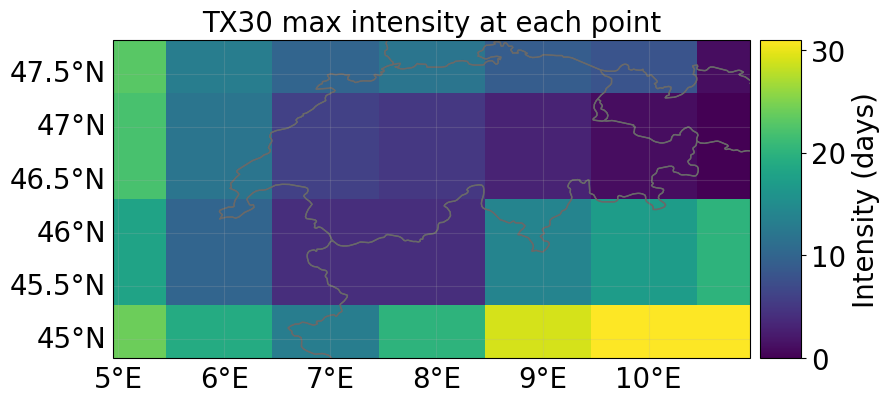

In [21]:
# load an example hazard
initiation_month_str = f"{month_name_to_number(initiation_month[0]):02d}"
forecast_month_str = f"{handler.valid_period_str[-2:]}"  # Last month in valid period
forecast_year =  year_list[0]
if int(initiation_month_str) > int(forecast_month_str):
    forecast_year += 1  # Forecast extends to the next year

# Load the hazard and plot intensity for the selected grid, maximized over ensemble
path_to_hazard = handler.get_pipeline_path(forecast_year, initiation_month_str, "hazard")
haz = Hazard.from_hdf5(path_to_hazard)

if haz:
    available_dates = sorted(set(haz.date))  # Remove duplicates and sort
    readable_dates = [dt.datetime.fromordinal(d).strftime('%Y-%m-%d') for d in available_dates] # Convert ordinal dates to ISO 8601 date format (YYYY-MM-DD)
    print("Available Dates Across Members:", readable_dates)  # Print only unique dates

    # Find the closest date in the dataset
    target_date = dt.datetime(forecast_year, int(forecast_month_str), 1).toordinal()
    closest_date = min(available_dates, key=lambda x: abs(x - target_date))
    closest_date_str = dt.datetime.fromordinal(closest_date).strftime('%Y-%m-%d')

    # Plot intensity for the selected event
    print(f"Selected Date for Plotting: {closest_date_str}")
    haz.select(date=[closest_date, closest_date]).plot_intensity(event=0, smooth=False)
else:
    print("No hazard data found for the selected period.")

## Finished with the Seasonal Forecast Module, Now Moving on to Analyzing the Collected Data

#### 1. Start analyzing the data calculated by the index

In [22]:
import climada_petals
import os

# Get the location of climada_petals
print(climada_petals.__file__)

# List all available modules inside climada_petals.hazard.copernicus_interface
copernicus_dir = os.path.dirname(climada_petals.__file__) + "/hazard/copernicus_interface"
print("Checking directory:", copernicus_dir)
print(os.listdir(copernicus_dir))


/content/climada_python/climada_petals/climada_petals/__init__.py
Checking directory: /content/climada_python/climada_petals/climada_petals/hazard/copernicus_interface
['utility_functions.py', 'index_definitions.py', 'seasonal_statistics.py', '__pycache__', '__init__.py', 'temporary_bounding_box_functions.py', 'test', 'downloader.py', 'create_seasonal_forecast_hazard.py', 'heat_index.py']


In [23]:
# these functions could also be imported from climada_python in the future
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
from climada_petals.hazard.copernicus_interface.utility_functions import (plot_forecast, plot_tropical_nights_statistics, plot_seasonal_metrics_by_lat, plot_individual_and_aggregated_impacts, plot_impact_distributions, plot_statistics_per_location, plot_statistics_and_member_agreement)

Using monthly index file: /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/indices/TX30/TX30_boundsW4_S44_E11_N48_monthly.nc
Successfully loaded dataset: /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/indices/TX30/TX30_boundsW4_S44_E11_N48_monthly.nc


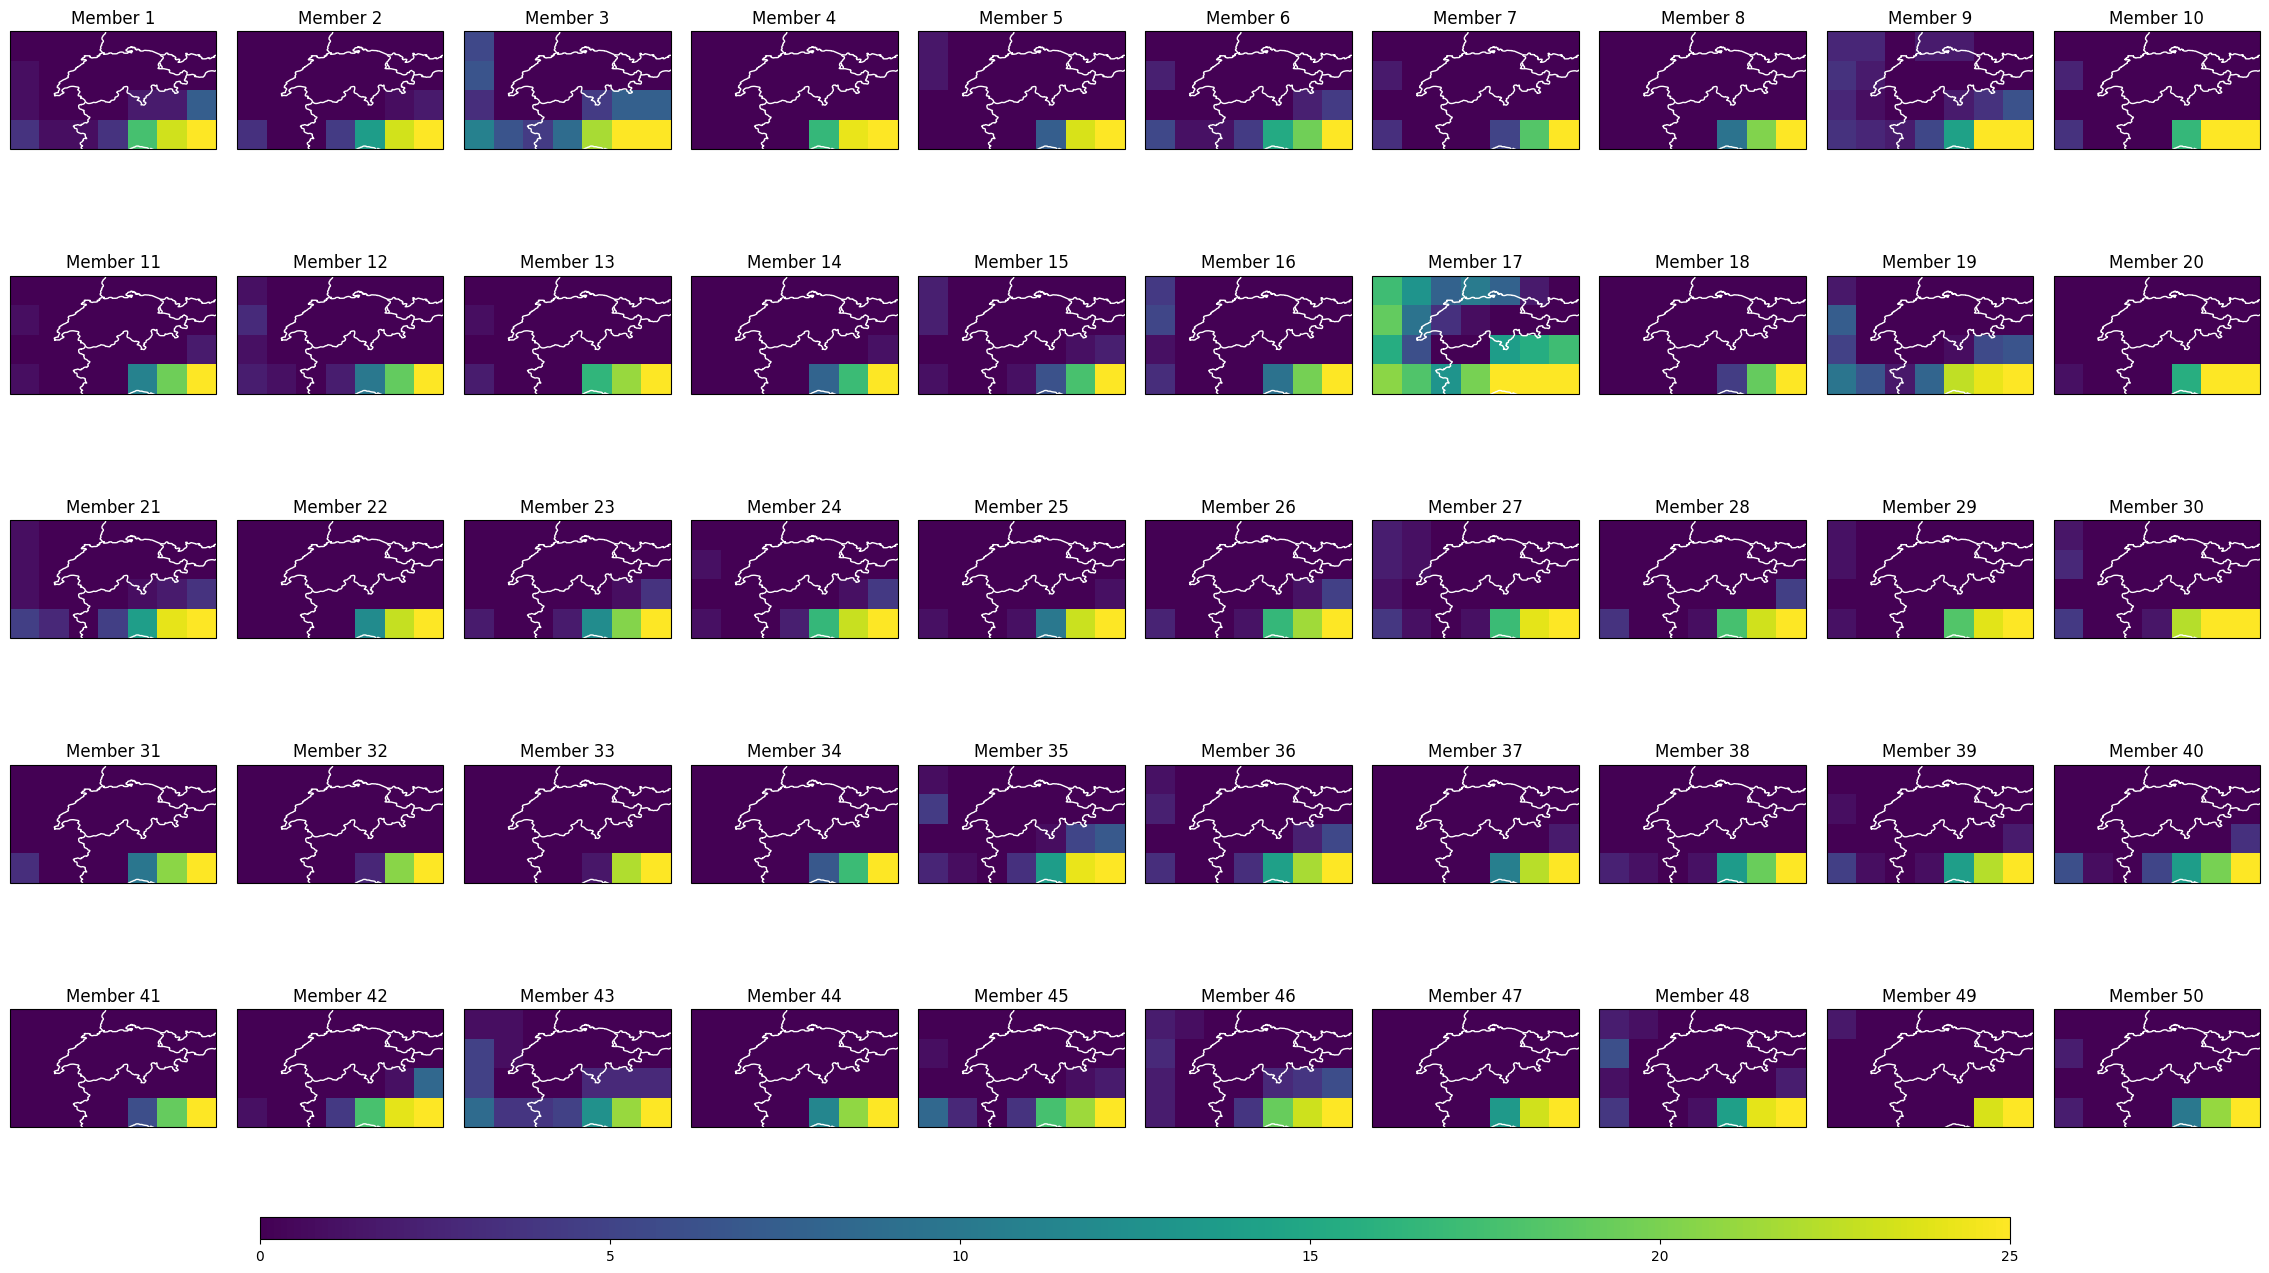

In [24]:
plot_forecast(2023, "03", "2023-07", handler)

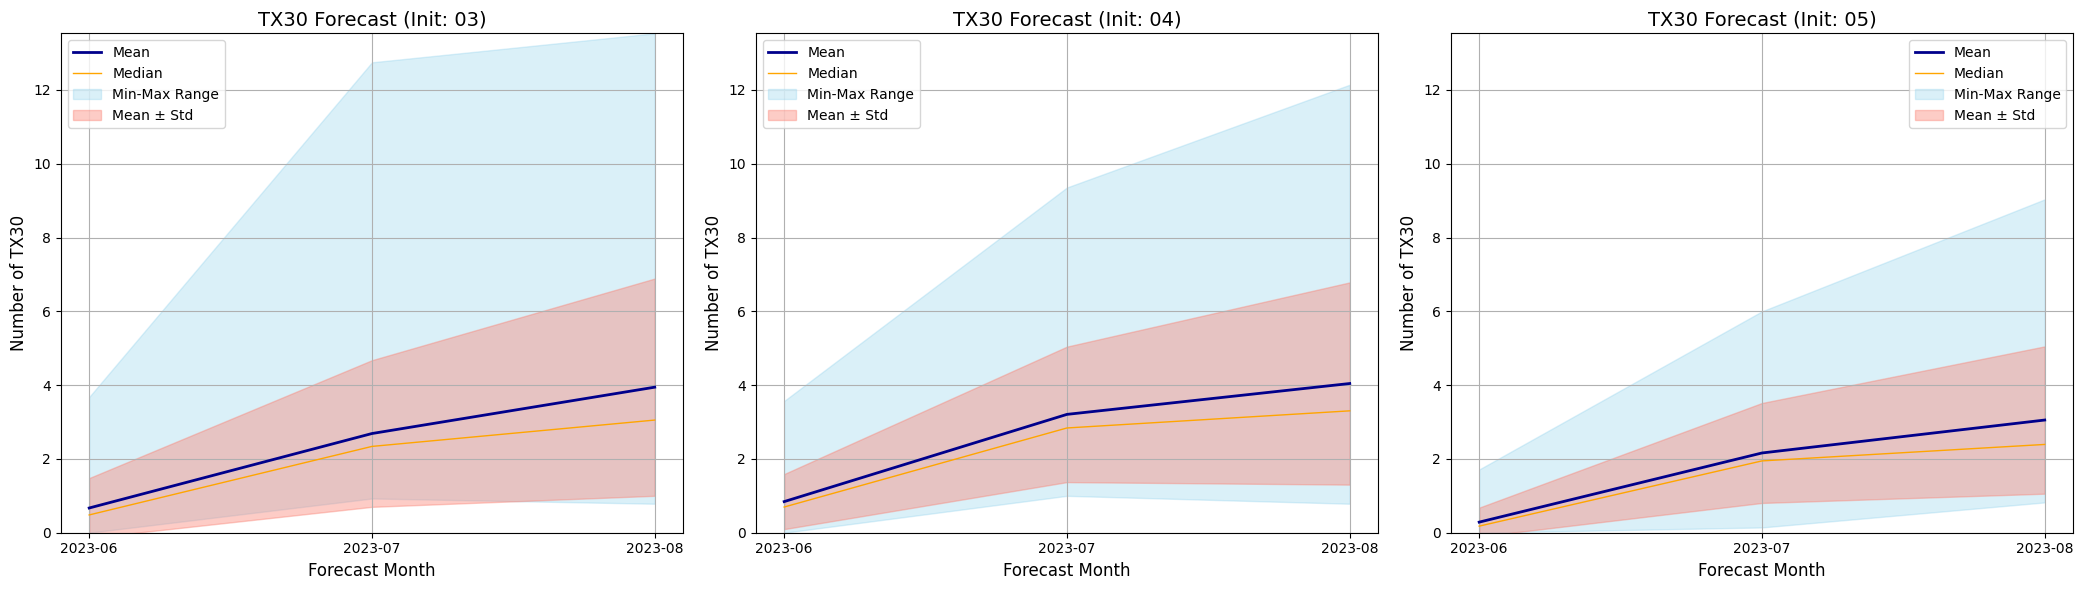

In [25]:
plot_tropical_nights_statistics(
    forecast_year=2023,
    initiation_months=["03","04", "05"],
    valid_periods=["06", "07", "08"],
    handler=handler
)

We can also explore the hazard's analytical tools, including an estimate of the return period. However, due to the limited number of events in the seasonal forecast dataset, **this does not represent a true return period**, but rather a demonstration of the methodology. For meteorological data, at least 30 years of data is typically required for this type of estimation.

2025-03-20 12:30:21,833 - climada.hazard.io - INFO - Reading /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/hazard/TX30/TX30_boundsW4_S44_E11_N48.hdf5


(array([[<GeoAxes: title={'center': 'Return period: 25 years'}>,
         <GeoAxes: title={'center': 'Return period: 50 years'}>],
        [<GeoAxes: title={'center': 'Return period: 100 years'}>,
         <GeoAxes: title={'center': 'Return period: 250 years'}>]],
       dtype=object),
 array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan]]))

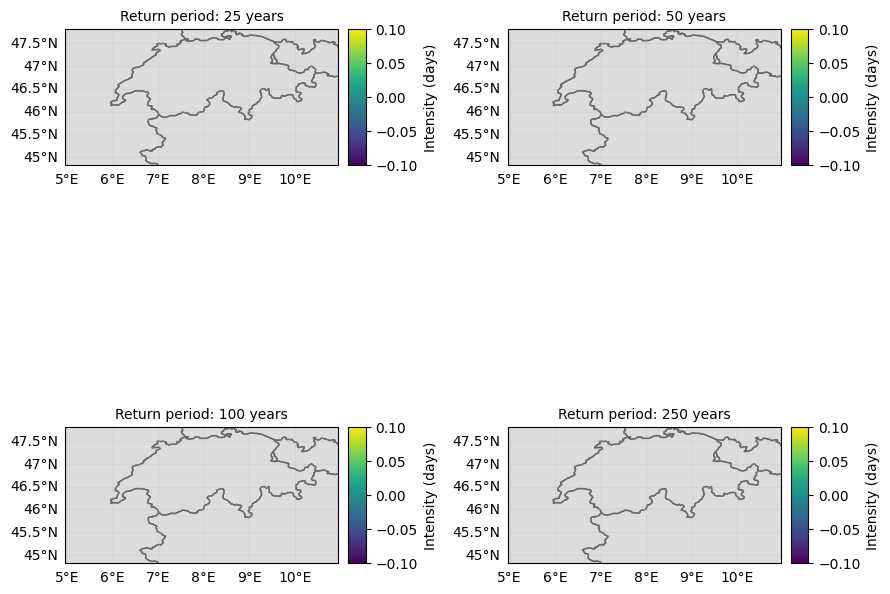

In [26]:
# Load the hazard and plot intensity for the selected grid, maximized over ensemble
path_to_hazard = handler.get_pipeline_path(forecast_year, initiation_month_str, "hazard")
hazard = Hazard.from_hdf5(path_to_hazard)
# Visualize return periods of different locations using the plot_rp_intensity() function
hazard.plot_rp_intensity(
    return_periods=(25, 50, 100, 250),
    smooth=True,
    axis=None,
    figsize=(9, 13),
    adapt_fontsize=True,
)

In [27]:
# Access hazard attributes
print("Hazard attributes:")
print(" - Shape of intensity (time, gridpoint):", hazard.intensity.shape)
print(" - Centroids:", hazard.centroids.shape)
print(" - Units:", hazard.units)
print(" - event_id:", hazard.event_id)
print(" - frequency:", hazard.frequency)
print(" - min, max fraction:", hazard.fraction.min(), hazard.fraction.max())
print(" - Date:", hazard.date)
print("min, max fraction: ", hazard.fraction.min(), hazard.fraction.max())
print(" - event_name:")
hazard.event_name

Hazard attributes:
 - Shape of intensity (time, gridpoint): (150, 28)
 - Centroids: (4, 7)
 - Units: days
 - event_id: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150]
 - frequency: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

['member0',
 'member0',
 'member0',
 'member1',
 'member1',
 'member1',
 'member2',
 'member2',
 'member2',
 'member3',
 'member3',
 'member3',
 'member4',
 'member4',
 'member4',
 'member5',
 'member5',
 'member5',
 'member6',
 'member6',
 'member6',
 'member7',
 'member7',
 'member7',
 'member8',
 'member8',
 'member8',
 'member9',
 'member9',
 'member9',
 'member10',
 'member10',
 'member10',
 'member11',
 'member11',
 'member11',
 'member12',
 'member12',
 'member12',
 'member13',
 'member13',
 'member13',
 'member14',
 'member14',
 'member14',
 'member15',
 'member15',
 'member15',
 'member16',
 'member16',
 'member16',
 'member17',
 'member17',
 'member17',
 'member18',
 'member18',
 'member18',
 'member19',
 'member19',
 'member19',
 'member20',
 'member20',
 'member20',
 'member21',
 'member21',
 'member21',
 'member22',
 'member22',
 'member22',
 'member23',
 'member23',
 'member23',
 'member24',
 'member24',
 'member24',
 'member25',
 'member25',
 'member25',
 'member26',
 'm

2025-03-20 12:31:46,756 - climada.hazard.io - INFO - Reading /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/hazard/TX30/TX30_boundsW4_S44_E11_N48.hdf5
2025-03-20 12:31:46,787 - climada.hazard.io - INFO - Reading /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init04/valid06_08/hazard/TX30/TX30_boundsW4_S44_E11_N48.hdf5
2025-03-20 12:31:46,812 - climada.hazard.io - INFO - Reading /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init05/valid06_08/hazard/TX30/TX30_boundsW4_S44_E11_N48.hdf5

--- Initiation Month 03 ---
Max intensity: 31.00
Min intensity: 0.00
Mean intensity (across all members): 3.94
Median intensity (across all members): 0.00
Standard Deviation: 7.37

--- Initiation Month 04 ---
Max intensity: 31.00
Min intensity: 0.00
Mean intensity (across all members): 4.04
Median intensity (across all members): 0.00
Standard Deviation: 6.89

--- Initiation Month 05 ---
Max intensity: 31.00
Min intensity: 

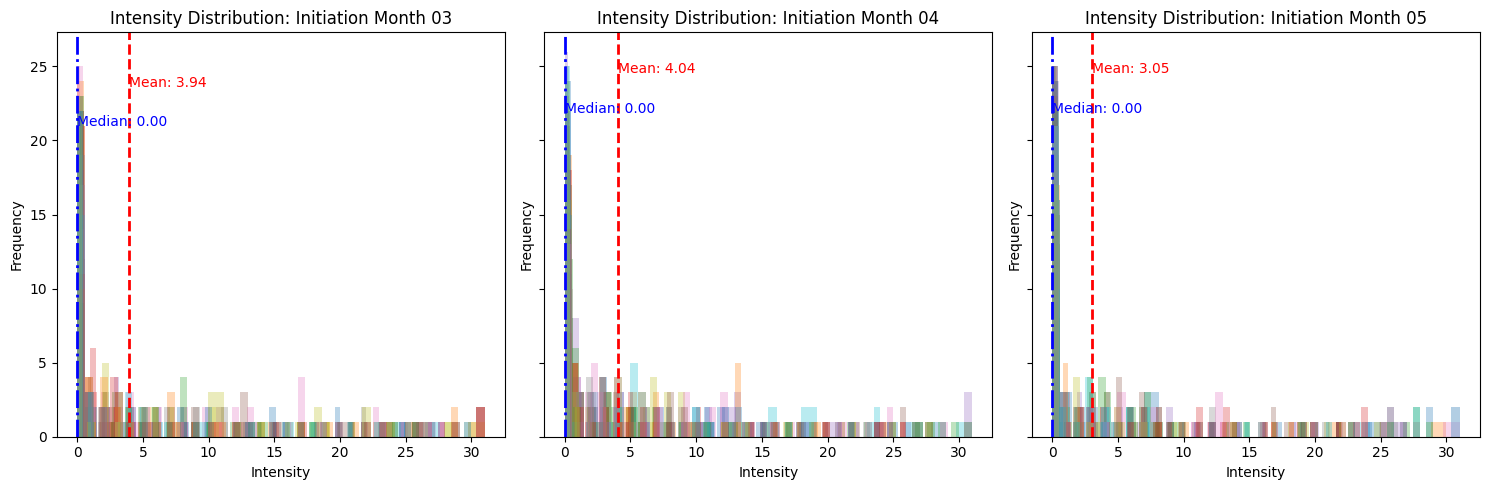

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from climada.hazard import Hazard

# Function to load hazard data efficiently
def load_hazard_data(year, month):
    """Load hazard data for a given year and initiation month."""
    hazard_path = handler.get_pipeline_path(year, month, "hazard")
    try:
        return Hazard.from_hdf5(hazard_path)
    except FileNotFoundError:
        print(f"Warning: No hazard data found for initiation month {month}")
        return None

# Load hazard data for initiation months 03, 04, and 05
hazards = {month: load_hazard_data(2023, month) for month in ["03", "04", "05"]}

# Extract event-wise intensity data
intensity_data = {}
for month, hazard in hazards.items():
    if hazard:
        intensity_data[month] = {
            event: hazard.intensity[i, :].toarray().flatten()
            for i, event in enumerate(hazard.event_name)
        }
    else:
        intensity_data[month] = {}

# Function to print summary statistics efficiently
def print_summary_statistics(intensity_data):
    """Print summary statistics for each initiation month."""
    for month, intensity_dict in intensity_data.items():
        all_intensities = np.concatenate(list(intensity_dict.values())) if intensity_dict else np.array([])
        print(f"\n--- Initiation Month {month} ---")
        if all_intensities.size > 0:
            print(f"Max intensity: {np.max(all_intensities):.2f}")
            print(f"Min intensity: {np.min(all_intensities):.2f}")
            print(f"Mean intensity (across all members): {np.mean(all_intensities):.2f}")
            print(f"Median intensity (across all members): {np.median(all_intensities):.2f}")
            print(f"Standard Deviation: {np.std(all_intensities):.2f}")
        else:
            print("No intensity data found!")

# Print statistics
print_summary_statistics(intensity_data)

# Function to plot intensity distributions
def plot_intensity_distributions(intensity_data):
    """Plot intensity distributions for all initiation months with mean & median values."""
    fig, axes = plt.subplots(1, len(intensity_data), figsize=(15, 5), sharey=True)

    if len(intensity_data) == 1:
        axes = [axes]  # Ensure axes is iterable for a single plot

    colors = sns.color_palette("tab10", n_colors=50)  # Generate distinct colors for up to 50 members

    for ax, (month, intensity_dict) in zip(axes, intensity_data.items()):
        if intensity_dict:
            all_intensities = np.concatenate(list(intensity_dict.values())) if intensity_dict else np.array([])

            # Plot histogram for all members' data with distinct colors
            for idx, (event, data) in enumerate(intensity_dict.items()):
                ax.hist(data, bins=50, alpha=0.3, color=colors[idx % len(colors)], density=False)

            # Calculate mean & median
            if all_intensities.size > 0:
                mean_val = np.mean(all_intensities)
                median_val = np.median(all_intensities)

                # Add mean & median lines
                ax.axvline(mean_val, color="red", linestyle="--", linewidth=2)
                ax.axvline(median_val, color="blue", linestyle="-.", linewidth=2)

                # Annotate mean & median values
                ax.text(mean_val, ax.get_ylim()[1] * 0.9, f"Mean: {mean_val:.2f}", color="red", fontsize=10)
                ax.text(median_val, ax.get_ylim()[1] * 0.8, f"Median: {median_val:.2f}", color="blue", fontsize=10)

            ax.set_title(f"Intensity Distribution: Initiation Month {month}")
            ax.set_xlabel("Intensity")
            ax.set_ylabel("Frequency")

        else:
            ax.set_title(f"No Data for Initiation Month {month}")

    plt.tight_layout()
    plt.show()

# Plot distributions
plot_intensity_distributions(intensity_data)

### 2. We can now estimate the exposure.

After creating the hazard, we proceed to create the exposure. Exposure refers to the collection of assets, individuals, infrastructure, and other elements within a specific area of interest that may be vulnerable to hazards. It encompasses their geographical coordinates, values, and other relevant information. There are two main options for obtaining exposure data:

1. **CLIMADA's Ready-to-Use Data**:
CLIMADA offers pre-existing exposure data called LitPop. LitPop combines estimates of asset value, economic activity, or population based on nightlight intensity (Lit) and population count data (Pop). The formula for disaggregating asset exposure value to grid points is proportional to:

$$
Litpop = Lit^m \cdot Pop^n
$$



where \(m\) and \(n\) are user-defined exponents (default values are \(m=n=1\)).

LitPop can be set to focus on different socio-economic indicators such as:

- Produced Capital ('pc'): Uses infrastructure and assets as proxies for exposure.
- Population Count ('pop'): Uses population density as a proxy.
- Gross Domestic Product ('gdp'): Uses economic output as a measure of exposure.
- Other modes include income group ('income_group'), household wealth ('tw' or 'nfw'), normalized values ('norm'), or raw nightlight intensity ('none').

The default mode provides information on USD assets, while setting `fin_mode='pop'` provides population counts. Users can adjust the weight between GDP and population in LitPop using exponents such as, Population-Weighted `(1, 0)` or  GDP-Weighted`(0, 1)` depending on the desired focus. For example:

$$
Population^1 \cdot GDP^0
$$

More details can be found in the [LitPop documentation](https://climada-python.readthedocs.io/en/stable/tutorial/climada_entity_LitPop.html).



2. **Custom Data**:
If you have your own exposure data, you can provide it in formats such as `pandas.DataFrame`, `geopandas.GeoDataFrame`, or an Excel file. This allows users to define exposed elements with their own asset values, economic activity metrics, or population data. For further customization details, refer to the [Exposures documentation](https://climada-python.readthedocs.io/en/stable/tutorial/climada_entity_Exposures.html).


>**Tip:** The LitPop population data combines gridded night lights from NASA at a resolution of approximately 500 meters (15 arcseconds) and gridded population data from CIESIN at a resolution of about 1 km (30 seconds). Therefore, LitPop exposures can be retrieved at a maximum resolution of about 500 meters, depending on the input data. The resolution can be set using the "res_arcsec" parameter. [More information](https://essd.copernicus.org/articles/12/817/2020/)  

We will now turn our attention to the LitPop data to be used in this demonstration. But first, there are a few points to mention:

- You can provide either single countries or a list of countries (e.g., ISO3 codes like `'CHE'` for Switzerland or `'DEU'` for Germany).
- Default LitPop exposure entities can be loaded for specific countries and years.
- To include all EU countries, add their ISO3 codes (e.g., `['AUT', 'BEL', 'BGR', ...]`).
- Resolution can be adjusted using the parameter `res_arcsec`, with the default being 30 arcseconds (~1 km). Higher resolutions (e.g., 15 arcseconds) may require more computational resources.
- Sub-national GDP data can be used as an intermediate downscaling layer for countries with large regional differences by activating `admin1_calc=True`.

In [29]:
from climada.util.api_client import Client

client = Client()

# Fetch the list of LitPop dataset infos for Switzerland
litpop_datasets = client.list_dataset_infos(
    data_type="litpop", properties={"country_name": ["Switzerland"]}
)
litpop_df = client.into_datasets_df(litpop_datasets)
litpop_df  # The 150 arcsec is app 4.631 kilometers

,data_type,data_type_group,uuid,name,version,status,doi,description,license,activation_date,expiration_date,res_arcsec,exponents,fin_mode,spatial_coverage,climada_version,date_creation,country_iso3alpha,country_name,country_iso3num
0,litpop,exposures,d99916c1-343c-4826-96d6-d11987e4399f,LitPop_assets_pc_150arcsec_CHE,v3,active,None,LitPop asset value exposure per country: Gridd...,Attribution 4.0 International (CC-BY-4.0),2024-06-07 08:21:45.678322+00:00,None,150,"(3,0)",pc,country,v4.1.1 (v3.1.2),2022-6-30,CHE,Switzerland,756
1,litpop,exposures,9203fb46-5d65-45a8-98d7-ad439463ae2b,LitPop_pop_150arcsec_CHE,v3,active,None,LitPop population exposure per country: Gridde...,Attribution 4.0 International (CC-BY-4.0),2024-06-07 08:21:52.088193+00:00,None,150,"(0,1)",pop,country,v4.1.1 (v3.1.2),2022-6-30,CHE,Switzerland,756
2,litpop,exposures,4aafe246-c3bf-4f1e-b3d4-79831abf9d91,LitPop_150arcsec_CHE,v3,active,None,LitPop asset value exposure per country: Gridd...,Attribution 4.0 International (CC-BY-4.0),2024-06-07 08:21:55.124056+00:00,None,150,"(1,1)",pc,country,v4.1.1 (v3.1.2),2022-6-26,CHE,Switzerland,756


In [30]:
import climada

# A simple example to test functionality
from climada.entity import Exposures
from climada.hazard import Hazard

2025-03-20 12:32:03,948 - climada.entity.exposures.base - INFO - Reading /root/climada/data/exposures/litpop/LitPop_pop_150arcsec_CHE/v3/LitPop_pop_150arcsec_CHE.hdf5
/root/climada/data/exposures/litpop/LitPop_pop_150arcsec_CHE/v3/LitPop_pop_150arcsec_CHE.hdf5


<GeoAxes: title={'center': "LitPop Exposure for ['CHE'] at 150 as, year: 2018, financial mode:\npop, exp: (0, 1), admin1_calc: False"}>

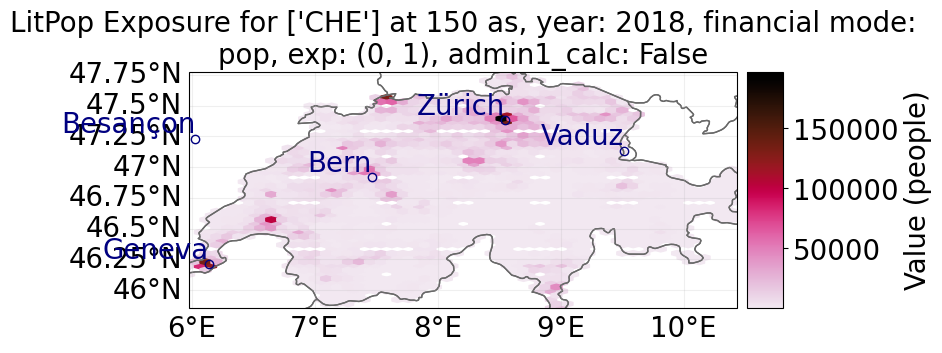

In [31]:
from climada.util.api_client import Client
import geopandas as gpd

# Get the LitPop population dataset for Switzerland
dataset_path = Client().get_dataset_file(
    data_type="litpop",
    properties={
        "country_name": "Switzerland",
        "fin_mode": "pop",
    },
)

litpop_exp = Exposures.from_hdf5(dataset_path)

print(dataset_path)

litpop_exp.plot_hexbin(gridsize=50)



## 3. Set up vulnerability and calculate potential damages

### Creating a impact funtion

Here, we create a "dummy" impact function to examine the interaction of metrix selected in LitPop. The impact function is created by utilizing the previously generated hazard and exposure datasets.

The impact function is crafted, incorporating the following key elements, [click for more information](https://climada-python.readthedocs.io/en/latest/tutorial/climada_engine_Impact.html):

* Intensity: This array represents the intensity levels of the hazard. It is created using the np.linspace function, which generates a sequence of evenly spaced values between the specified start (0) and end (10) points. In this case, the array contains 100 intensity levels ranging from 0 to 10.

* MDD: This array represents the Mean Degree of Damage (MDD) values associated with the hazard intensity levels. Similar to intensity, it is created using np.linspace to generate 100 evenly spaced values between 0 and 10.

* PAA: This array represents the Proportion of Assets Affected (PAA) values associated with the hazard intensity levels. In this case, paa is initialized with ones, resulting in an array of the same size as intensity with all elements set to 1. This suggests that there is a 100% probability of avoiding or mitigating the impact at each intensity level.

* impf_dum: An ImpactFunc object is instantiated with the provided parameters, including the hazard type, hazard ID, intensity, MDD, PAA, and units for intensity and MDD. The impact function is labeled as "dummy".

* impact_func_set: An ImpactFuncSet object is created, representing a collection or set of impact functions. The impf_dum impact function is added to this set using the ImpactFuncSet constructor with [impf_dum] as the argument.

* impf_ras.check(): This line of code calls the check() method on the impf_ras impact function set.


https://climada-python.readthedocs.io/en/stable/tutorial/climada_engine_Impact.html#impact-class-data-structure

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from climada.hazard import Hazard
from climada.engine import ImpactCalc, Impact
from climada.entity.impact_funcs import ImpactFuncSet, ImpactFunc
from climada.util.config import CONFIG

# Define numerical initiation months directly
initiation_month = ["03", "04", "05"]

# Define file paths and parameters
climada_base_path = CONFIG.hazard.copernicus.local_data.dir()
countries = ["CHE"]

# Load exposure data
try:
    print("Loading exposure data...")
    exposure = LitPop.from_countries(countries, res_arcsec=30, fin_mode="pop", exponents=(1, 0))
    print("Exposure data loaded successfully.")
except Exception as e:
    print(f"Error loading exposure data: {e}")
    exposure = None

if exposure:
    intensity_array = np.linspace(0, 31, 20)
    mdd_array = np.clip(np.log1p(intensity_array) / np.log1p(31), 0, 1)
    paa_array = np.clip(intensity_array / 31, 0, 1)

    if_set = ImpactFuncSet()
    impact_func = ImpactFunc()
    impact_func.haz_type = index_metric
    impact_func.id = 1
    impact_func.intensity = intensity_array
    impact_func.mdd = mdd_array
    impact_func.paa = paa_array
    if_set.append(impact_func)

    saved_files = []

    for month_num in initiation_month:
        print(f"Calculating impact for initiation month {month_num}...")

        year_str = str(year_list[0])
        hazard_dir = os.path.join(climada_base_path, "seasonal_forecasts", "dwd", "sys21", year_str,
                                  f"init{month_num}", "valid06_08", "hazard", index_metric)

        if not os.path.isdir(hazard_dir):
            print(f"Warning: Hazard directory does not exist: {hazard_dir}")
            continue  # Skip this month if the folder is missing

        hazard_files = [f for f in os.listdir(hazard_dir) if f.startswith(f"{index_metric}_") and f.endswith(".hdf5")]
        if not hazard_files:
            print(f"Warning: No hazard file found in {hazard_dir}")
            continue  # Skip if no hazard files found

        hazard_file = hazard_files[0]
        hazard_path = os.path.join(hazard_dir, hazard_file)

        try:
            hazard = Hazard.from_hdf5(hazard_path)
            print(f"Hazard data loaded successfully for initiation month {month_num}.")
        except Exception as e:
            print(f"Error loading hazard data for {month_num}: {e}")
            continue  # Skip if loading fails

        exposure.assign_centroids(hazard)
        impact = ImpactCalc(exposure, if_set, hazard).impact(save_mat=True)

        impact_folder = os.path.join(climada_base_path, "seasonal_forecasts", "dwd", "sys21", year_str,
                                     f"init{month_num}", "valid06_08", "impact", index_metric)
        os.makedirs(impact_folder, exist_ok=True)

        impact_file = os.path.join(impact_folder, hazard_file)
        impact.write_hdf5(impact_file)
        saved_files.append(impact_file)
        print(f"Impact saved: {impact_file}")

    print("\nImpact calculations completed successfully.")

    if saved_files:
        print("\nImpact Files Saved at:")
        for file in saved_files:
            print(f" - {file}")

    # Load impact data if available
    impact_objects = []
    for file in saved_files:
        try:
            impact_objects.append(Impact.from_hdf5(file))
        except Exception as e:
            print(f"Error loading impact file {file}: {e}")

    # Plot comparison if impact data is available
    if impact_objects:
        fig, ax = plt.subplots(figsize=(6, 4))
        ax.bar(
            initiation_month[:len(impact_objects)],
            [impact.at_event.sum() for impact in impact_objects],
            color=["blue", "orange", "green"]
        )
        ax.set_xlabel("Initiation Month")
        ax.set_ylabel("Total Impact")
        ax.set_title("Comparison of Total Impact for Initiation Months")
        plt.show()

In [ ]:
impact_func.plot();

In [ ]:
# Load Impact objects into a dictionary
impacts = {
    "03": Impact.from_hdf5(saved_files[0]),
    "04": Impact.from_hdf5(saved_files[1]),
    "05": Impact.from_hdf5(saved_files[2])
}

for month in ["03", "04", "05"]:
    if month in impacts:
        total_impact = impacts[month].at_event.mean()
        print(f"Total Impact at Event Level for Initiation Month {month}: {total_impact:,.0f}")
    else:
        print(f"Warning: No impact data found for Initiation Month {month}")

Now we can explore metrics to assess the differences in impact between different initiation periods.

- Mean Impact: The average impact per event, aggregated across all ensemble members for each event on a specific date.
- Max Impact: The highest impact recorded across all events on a given date.
- Min Impact: The lowest impact recorded, often indicating whether zero-impact events are present.
- Standard Deviation (Std Dev): A measure of how much the impact varies around the mean.
- Interquartile Range (IQR): The range between the 75th percentile (Q3) and the 25th percentile (Q1), representing the middle 50% of impact values.
- Coefficient of Variation (CV): The ratio of standard deviation to the mean, indicating relative variability in the impact distribution.
- Percentage of Zero-Impact Events: The proportion of events with no recorded impact, highlighting areas where forecasts predict no effects.
- Skewness: A measure of asymmetry in the impact distribution. A positive value indicates a long right tail (high-impact outliers), while a negative value suggests more low-impact events.
- Kurtosis: Indicates whether the impact distribution has a sharp peak (high kurtosis) or is more evenly spread out (low kurtosis).

These statistics help compare the impact forecasts across different initiation periods and forescat months. High variability (high std dev or CV) suggests uncertainty in the predictions, while differences in skewness and kurtosis can indicate whether extreme events dominate the impact distribution. The percentage of zero-impact events highlights differences in forecasted exposure to hazards.

By comparing these metrics across initiation periods, users can assess forecast reliability, uncertainty, and the likelihood of extreme impact events.


In [ ]:
from datetime import datetime
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis

# Store results for later display in a table
results = []

for month in ["03", "04", "05"]:
    if month in impacts:
        impact_obj = impacts[month]
        dates = [datetime.fromordinal(int(d)).strftime("%Y-%m-%d") for d in np.unique(impact_obj.date)]  # Convert ordinal dates to standard YYYY-MM-DD format

        # Extract impact per event
        impact_per_event = impact_obj.at_event  # Total impact per event
        df = pd.DataFrame({"date": impact_obj.date, "impact": impact_per_event})

        # Compute statistics per date including IQR, CV, Skewness, Kurtosis, and Zero-Impact Events Percentage
        impact_stats = df.groupby("date")["impact"].agg(
            mean="mean",
            max="max",
            min="min",
            std="std",
            q25=lambda x: x.quantile(0.25),  # 25th percentile
            q75=lambda x: x.quantile(0.75),  # 75th percentile
            skewness=lambda x: skew(x, nan_policy="omit"),  # Skewness
            kurt=lambda x: kurtosis(x, nan_policy="omit"),  # Kurtosis
            zero_impact=lambda x: (x == 0).sum() / len(x) * 100  # Percentage of zero impact events
        ).reset_index()

        # Compute IQR (Interquartile Range) and Coefficient of Variation (CV)
        impact_stats["iqr"] = impact_stats["q75"] - impact_stats["q25"]
        impact_stats["cv"] = impact_stats["std"] / impact_stats["mean"] * 100

        for date, row in zip(dates, impact_stats.itertuples(index=False)):
            results.append([
                month,
                date,
                round(row.mean, 1),
                round(row.max, 1),
                round(row.min, 1),
                round(row.std, 1),
                round(row.iqr, 1),  # IQR added
                round(row.cv, 1),  # Coefficient of Variation (CV)
                round(row.skewness, 2),  # Skewness
                round(row.kurt, 2),  # Kurtosis
                round(row.zero_impact, 1)  # Percentage of Zero-Impact Events
            ])

    else:
        print(f"Warning: No impact data found for Initiation Month {month}")

# Convert results to DataFrame for better visualization
df_results = pd.DataFrame(results, columns=[
    "Initiation Month", "Date", "Mean Impact", "Max Impact", "Min Impact",
    "Std Dev", "IQR", "CV (%)", "Skewness", "Kurtosis", "Zero-Impact (%)"
])
df_results["Date"] = pd.to_datetime(df_results["Date"])
df_results

In [ ]:
# Compute exceedance frequency curves for all initiation months
freq_curves = {}
for month in ["03", "04", "05"]:
    if month in impacts:
        freq_curves[month] = impacts[month].calc_freq_curve()
    else:
        print(f"Warning: No impact data found for Initiation Month {month}")

# Plot frequency curves in a single figure
fig, ax = plt.subplots(figsize=(6, 4))

# Define colors for better visualization
colors = {"03": "green", "04": "blue", "05": "red"}

for month, curve in freq_curves.items():
    curve.plot(axis=ax, label=f"Initiation Month {month}", color=colors[month])

ax.set_title("Exceedance Frequency Curves for Initiation Months 03, 04, and 05")
ax.set_xlabel("Impact")
ax.set_ylabel("Exceedance Frequency")
ax.legend()
ax.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [ ]:
# Print event_id, event_name, date, and at_event for Initiation Month 03
print("Event IDs in Impact (03):", impacts["03"].event_id)
print("Event Names in Impact (03):", impacts["03"].event_name)
print("Event Dates in Impact (03):", impacts["03"].date)
print("Impact at Event Level (03):", impacts["03"].at_event)

In [ ]:
# Call the function for multiple initiation months
plot_individual_and_aggregated_impacts(year_list, index_metric,"03", "04", "05")

In [ ]:
plot_impact_distributions(year_list, index_metric, ["03", "04", "05"])

In [ ]:
plot_statistics_per_location([2023], "TX30", "03", "04", "05", scale="log")

In [ ]:
plot_statistics_and_member_agreement([2023], "TX30", 0.7, "04")